# Kelompok 4 :


1.   GEA01|016
2.   GEA01|017
3.   GEA01|018
4.   GEA01|019
5.   GEA01|020



# Dataset
Penjelasan Untuk Label
* 0: SMS Normal
* 1: Fraud atau Penipuan
* 2: Promo

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/JunTheCoder62/Feed/refs/heads/main/clean_data.csv')
data.head()

,Unnamed: 0,teks,label
0,0,promo beli paket flash gb my telkomsel app ext...,2
1,1,gb rp ribu spesial pilih aktif promo sd nov bu...,2
2,2,plg yth sisa kuota flash kb download mytelkoms...,2
3,3,plg yth sisa kuota flash kb download mytelkoms...,2
4,4,gb rp ribu spesial pilih aktif buru skb,2


## Preview Data

Total Jumlah SMS: 1143 data

terdiri dari (label):
-- [0] SMS Normal	: 569 data
-- [1] Fraud / Penipuan	: 335 data
-- [2] Promo		: 239 data



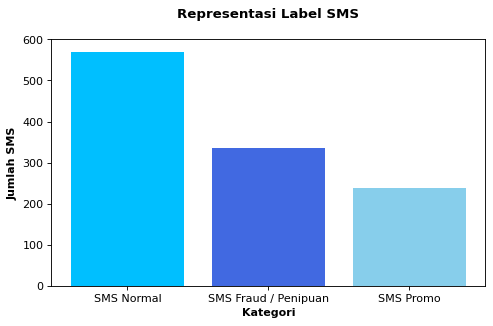

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] SMS Normal\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Fraud / Penipuan\t:', data[data.label == 1].shape[0], 'data')
print('-- [2] Promo\t\t:', data[data.label == 2].shape[0], 'data\n')

height = data['label'].value_counts()
labels = ('SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Representasi Label SMS\n', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah SMS', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)

plt.savefig('representasi label.png') # save plot

# Preprocessing
## Case Folding

In [ ]:
import re

def casefolding(text):
    text = text.lower() # merubah bentuk menjadi lower case
    text = re.sub(r'\d+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]','',text) # menghapus karakter tanda baca
    text = text.strip()
    return text

## Normalisasi

In [ ]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/Toyibers/Spam-SMS/main/Data%20Klasifikasi%20Spam%20SMS/data/key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm["singkat"] == word).any() else word for word in text.split()])
    text = str.lower(text)
    return text

## Filtering (Stopword Removal)

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [ ]:
# Download the 'stopwords' dataset
nltk.download('stopwords')

stop_factory = stopwords.words('indonesian')
more_stopword = ['daring', 'online', 'pd']

def remove_stop_words(text):
    sw = stop_factory + more_stopword
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Stemming

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

# Text Preprocessing Pipeline

In [ ]:
def data_process(text):
    # Convert text to string before casefolding
    text = str(text)
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [ ]:
import time

t1 = time.time()
data['teks'] = data['teks'].apply(data_process)
print('cleaning dataset elapsed time:', time.time() - t1, '\n')
print('cleaning dataset elapsed time in minutes:', (time.time() - t1) / 60, '\n')

cleaning dataset elapsed time: 23.109833478927612 

cleaning dataset elapsed time in minutes: 0.38516824642817177 



In [ ]:
data.to_csv('/content/clean_data.csv', encoding='utf-8')

## Membaca Clean Data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/clean_data.csv')

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,teks,label
0,0,0,promo beli paket flash gb my telkomsel app ext...,2
1,1,1,gb rupiah ribu spesial pilih aktif promo sd no...,2
2,2,2,pulang hormat sisa kuota flash kb download myt...,2
3,3,3,pulang hormat sisa kuota flash kb download myt...,2
4,4,4,gb rupiah ribu spesial pilih aktif buru skb,2


## Highest word frequencies in each class

In [ ]:
# prompt: CountVectorizer() import modul

from sklearn.feature_extraction.text import CountVectorizer

## Import Modul

In [ ]:
# Replace NaN values with an empty string before applying CountVectorizer
data['teks'] = data['teks'].fillna('')

# Now proceed with creating the word count matrix
cv = CountVectorizer()
words_count_matrix = cv.fit_transform(data['teks'])
count_vect = pd.DataFrame.sparse.from_spmatrix(words_count_matrix, columns=cv.get_feature_names_out())

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words_count_matrix = cv.fit_transform(data['teks'])
# SparseDataFrame is deprecated, use SparseArray within a DataFrame instead
# Use get_feature_names_out() instead of get_feature_names()
count_vect = pd.DataFrame.sparse.from_spmatrix(words_count_matrix, columns=cv.get_feature_names_out())

## Frekuensi Kata Label SMS Normal

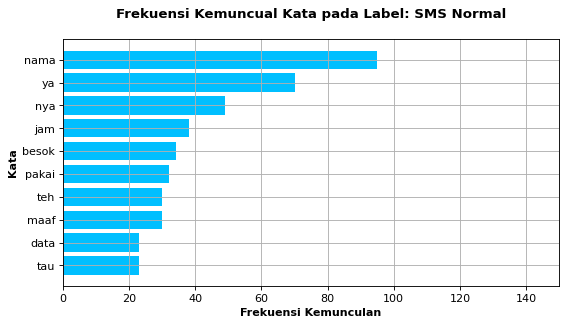

In [ ]:
# SMS Normal
normal_words = count_vect[data.label == 0]
normal_words_count = normal_words.sum()
indices = np.argsort(normal_words_count)[::-1][:10]
normal_words_count = normal_words_count[indices]

plt.figure(figsize=(8,4), dpi=80)
plt.barh(np.arange(len(normal_words_count)),
         normal_words_count.values,
         color='deepskyblue')
plt.yticks(np.arange(len(normal_words_count)), normal_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemuncual Kata pada Label: SMS Normal\n', fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
plt.ylabel('Kata', fontweight='bold')
plt.grid()

plt.savefig('frekuensi_kata_normal.png') # save plot

## WordCloud Label SMS Normal

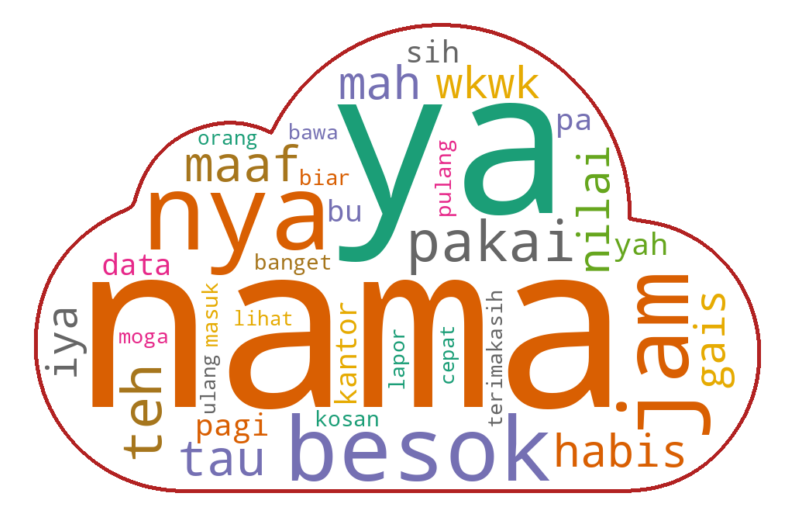

In [ ]:
import cv2

originalImage = cv2.imread('/content/cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

# WordCloud Label SMS Normal
sms_normal = data[data.label == 0]
normal_string = []
for t in sms_normal.teks:
    normal_string.append(t)
normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("worcloud_normal.png")

## Frekuensi Kata Label SMS Fraud

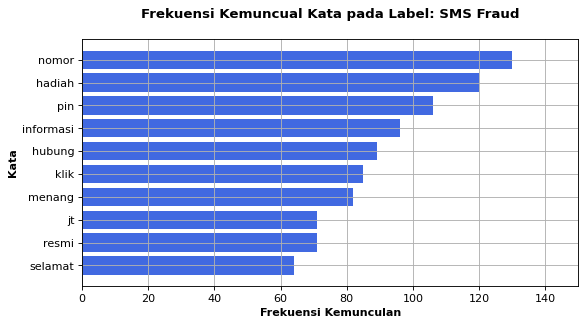

In [ ]:
# SMS Fraud
fraud_words = count_vect[data.label == 1]
fraud_words_count = fraud_words.sum()
indices = np.argsort(fraud_words_count)[::-1][:10]
fraud_words_count = fraud_words_count[indices]

plt.figure(figsize=(8,4), dpi=80)
plt.barh(np.arange(len(fraud_words_count)),
         fraud_words_count.values,
         color='royalblue')
plt.yticks(np.arange(len(fraud_words_count)), fraud_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemuncual Kata pada Label: SMS Fraud\n', fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
plt.ylabel('Kata', fontweight='bold')
plt.grid()

plt.savefig('frekuensi_kata_fraud.png') # save plot

## WordCloud Label SMS Fraud

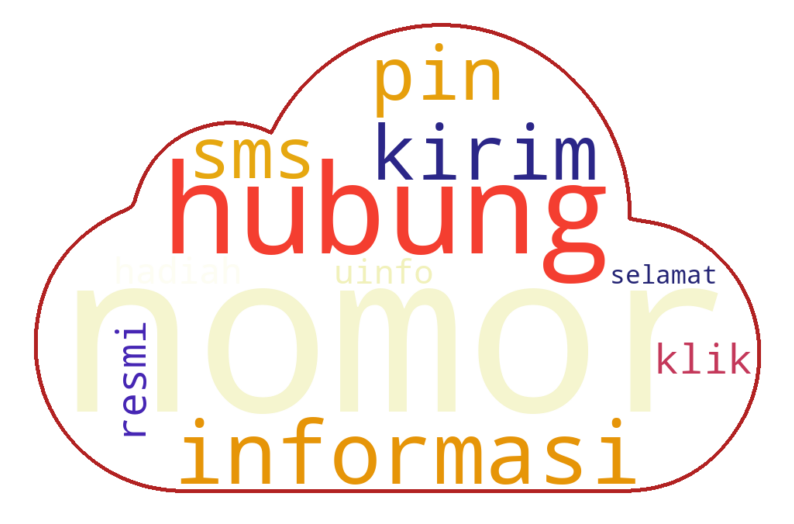

In [ ]:
# WordCloud Label SMS Fraud / Penipuan
sms_fraud = data[data.label == 1]
fraud_string = []
for t in sms_fraud.teks:
    fraud_string.append(t)
fraud_string = pd.Series(fraud_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='CMRmap',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(fraud_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("worcloud_fraud.png")

## Frekuensi Kata Label SMS Promo

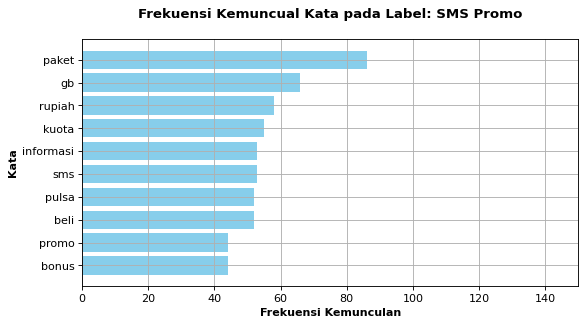

In [ ]:
# SMS Promo
promo_words = count_vect[data.label == 2]
promo_words_count = promo_words.sum()
indices = np.argsort(promo_words_count)[::-1][:10]
promo_words_count = promo_words_count[indices]

plt.figure(figsize=(8,4), dpi=80)
plt.barh(np.arange(len(promo_words_count)),
         promo_words_count.values,
         color='skyblue')
plt.yticks(np.arange(len(promo_words_count)), promo_words_count.keys())
plt.gca().invert_yaxis()
plt.xlim(0,150)
plt.title('Frekuensi Kemuncual Kata pada Label: SMS Promo\n', fontweight='bold')
plt.xlabel('Frekuensi Kemunculan', fontweight='bold')
plt.ylabel('Kata', fontweight='bold')
plt.grid()

plt.savefig('frekuensi_kata_promo.png') # save plot

## WordCloud Label SMS Promo

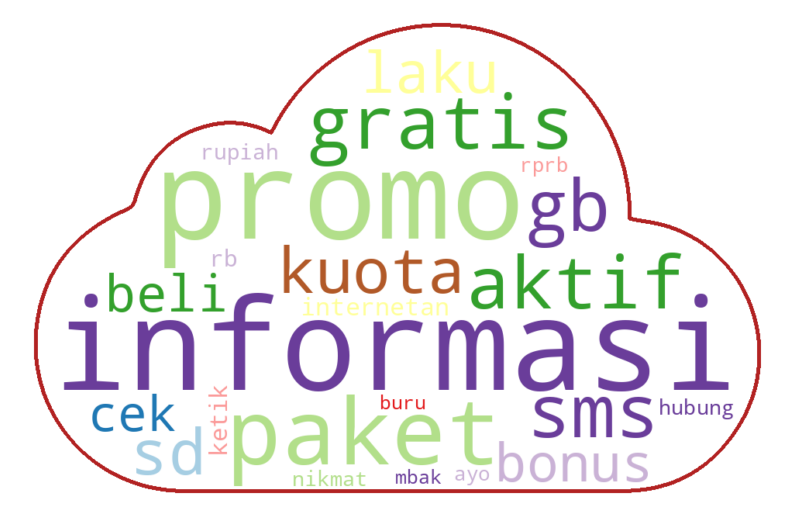

In [ ]:
# WordCloud Label SMS Promo
sms_promo = data[data.label == 2]
promo_string = []
for t in sms_promo.teks:
    promo_string.append(t)
promo_string = pd.Series(promo_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Paired',
                      max_font_size=300, min_font_size=25,
                      mask=cloud_mask, contour_width=5, contour_color='firebrick',
                      max_words=100).generate(promo_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("worcloud_promo.png")

# Get the most and least frequent words

## Top 50 Most Frequent Words

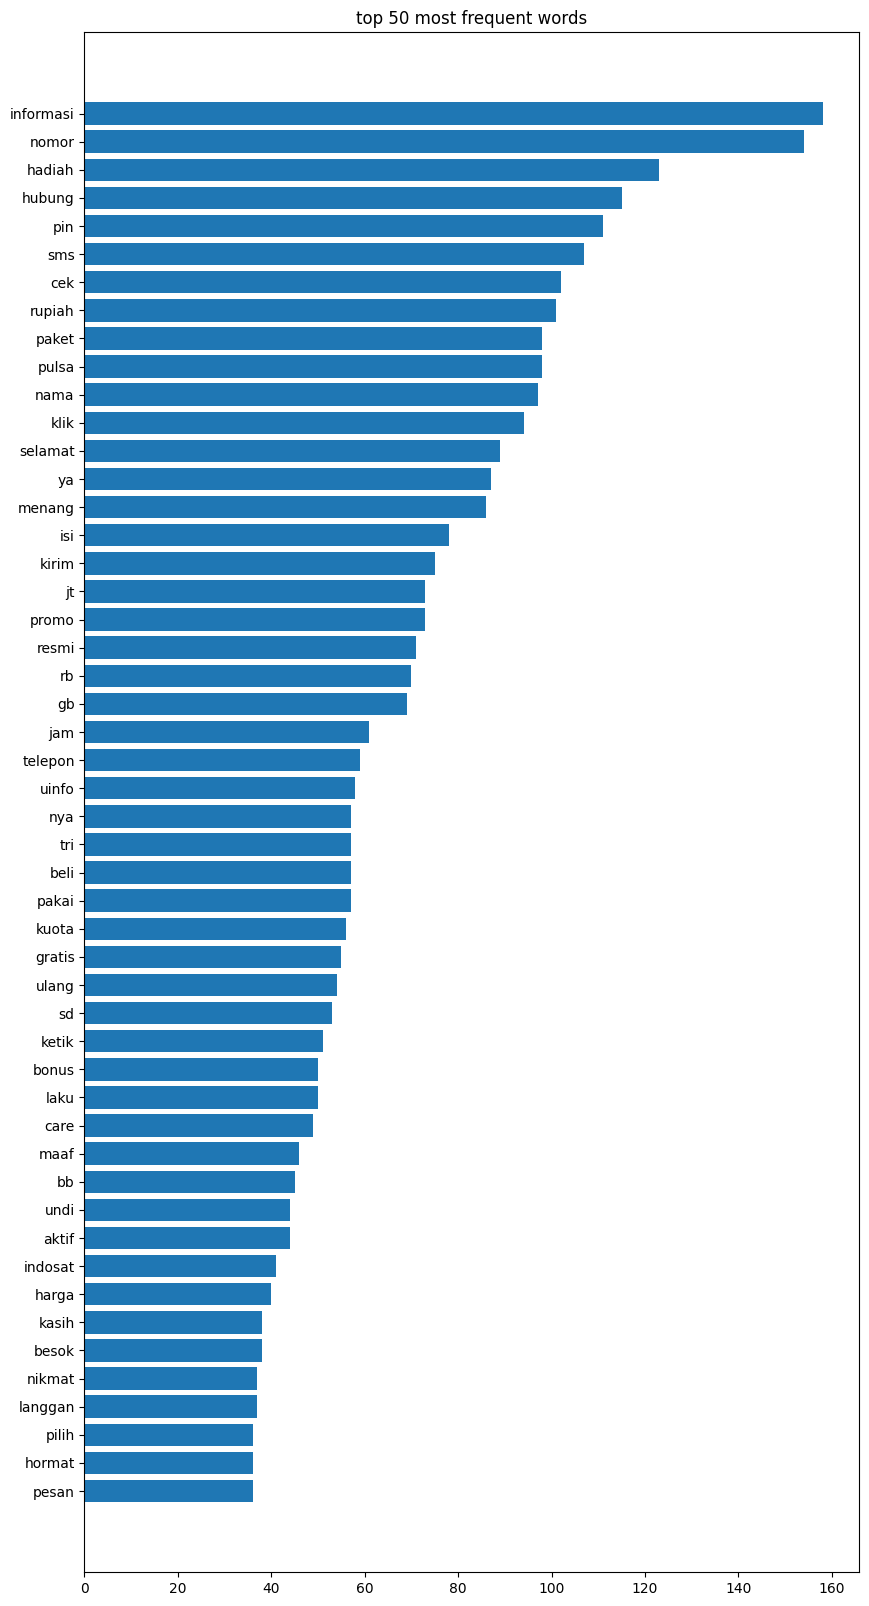

In [ ]:
all_word_count = count_vect[data.label < 3].sum()
indices = np.argsort(all_word_count)[::-1][:50]
all_word_count = all_word_count[indices]

plt.figure(figsize=(10, 20))
plt.barh(np.arange(len(all_word_count)), all_word_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(all_word_count)) + 0.4, all_word_count.keys())
plt.gca().invert_yaxis()
plt.title('top 50 most frequent words')
plt.show()

## Top 100 Least Frequent Words

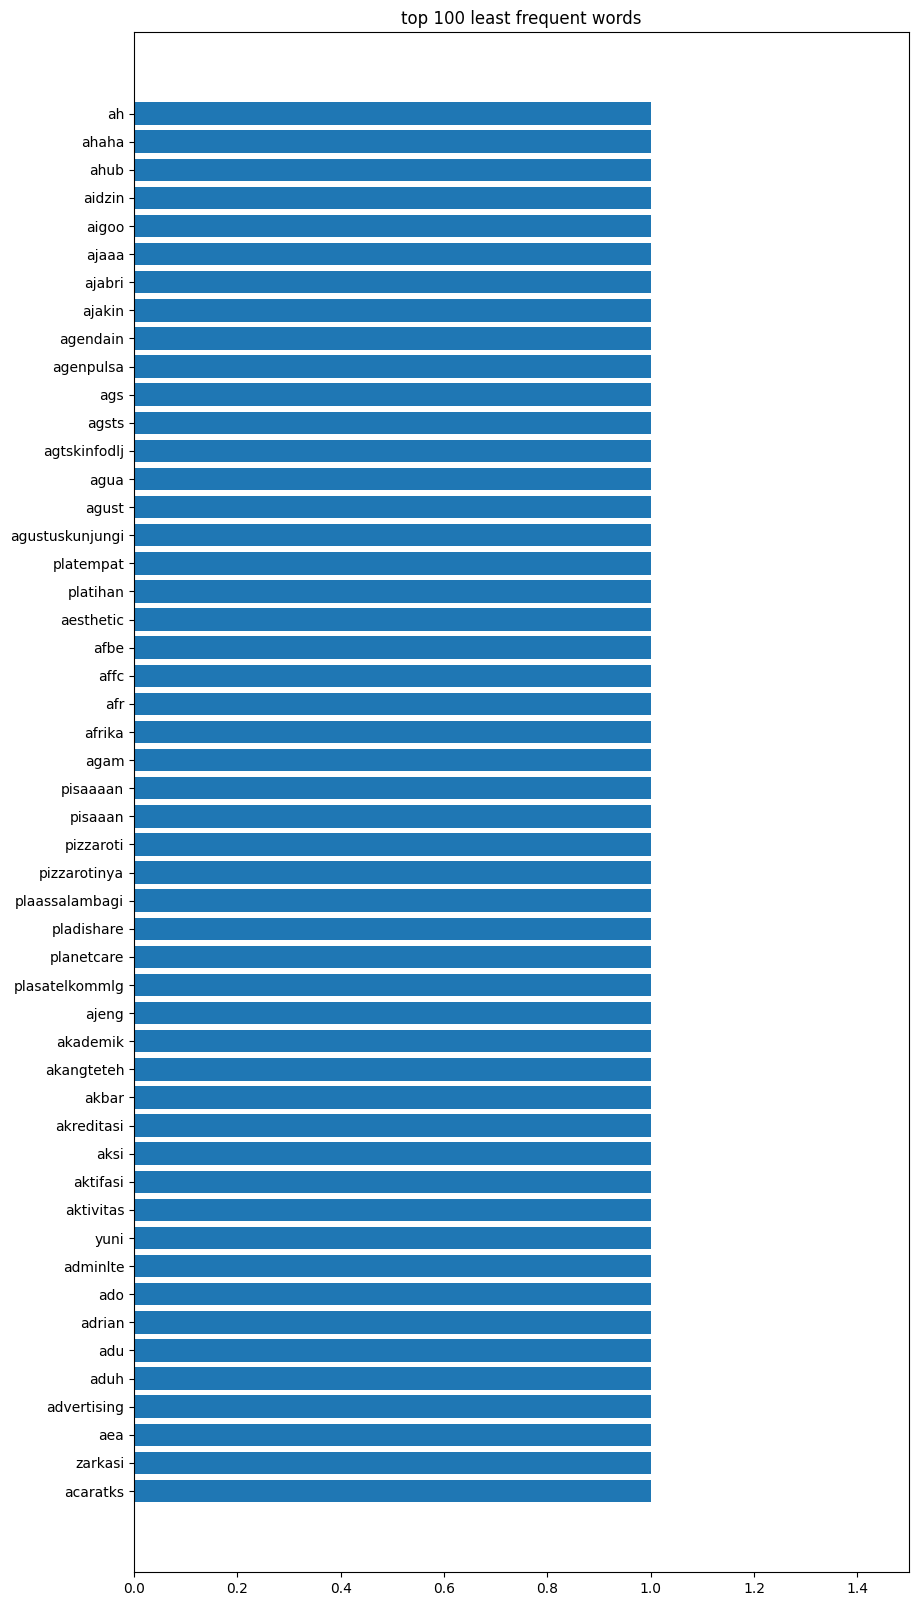

In [ ]:
all_word_count = count_vect[data.label < 3].sum()
indices = np.argsort(all_word_count)[:50]
all_word_count = all_word_count[indices]

plt.figure(figsize=(10, 20))
plt.xlim(0,1.5)
plt.barh(np.arange(len(all_word_count)), all_word_count.values, align='edge', height=0.8)
plt.yticks(np.arange(len(all_word_count)) + 0.4, all_word_count.keys())
plt.gca().invert_yaxis()
plt.title('top 100 least frequent words')
plt.show()

In [ ]:
all_word_count = count_vect[data.label < 3].sum()

In [ ]:
too_common_words = list(filter(lambda w: all_word_count[w] > 1000, all_word_count.keys()))
common_words = list(filter(lambda w: all_word_count[w] > 75, all_word_count.keys()))
too_rare_words = list(filter(lambda w: all_word_count[w] < 20, all_word_count.keys()))

In [ ]:
len(common_words)

16

In [ ]:
len(too_rare_words)

3292

In [ ]:
len(all_word_count.keys())

3391

# Model Evaluation

## Import Modul

In [ ]:
!pip install pandas nltk Sastrawi requests

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import os
import requests
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## LSTM

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JunTheCoder62/Feed/refs/heads/main/clean_data.csv')

In [ ]:
df

,Unnamed: 0,teks,label
0,0,promo beli paket flash gb my telkomsel app ext...,2
1,1,gb rp ribu spesial pilih aktif promo sd nov bu...,2
2,2,plg yth sisa kuota flash kb download mytelkoms...,2
3,3,plg yth sisa kuota flash kb download mytelkoms...,2
4,4,gb rp ribu spesial pilih aktif buru skb,2
...,...,...,...
1138,1138,yooo oke umumin grup kelas,0
1139,1139,nulis kerudung kirain warna jins,0
1140,1140,mba kirim ya,0
1141,1141,nama beaok bwrangkat pagimau cas atay tranfer,0


In [ ]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [ ]:
!pip install tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import keras

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)

TensorFlow version: 2.14.0
Keras version: 2.14.0
Numpy version: 1.26.4
Pandas version: 2.2.2
Scikit-learn version: 1.5.2


In [ ]:
# Check untuk missing values
data['teks'] = data['teks'].astype(str)

# drop missing values
data['teks'].fillna('', inplace=True)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(df['label'])

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(data['teks'].values)
X = tokenizer.texts_to_sequences(data['teks'].values)
X = pad_sequences(X)

# Convert labels to categorical
num_classes = len(np.unique(data['label']))
Y = to_categorical(data['label'], num_classes=num_classes)

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(Y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Create and train your model here for each fold
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))

    model.add(Dropout(0.2)) # Added dropout layer before LSTM
    model.add(LSTM(60, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dropout(0.3))
    model.add(LSTM(32))
    model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Print model summary
    model.summary()

    batch_size = 32
    epochs = 20

    history = model.fit(X_train, Y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_test, Y_test),
                        verbose=2,
                        callbacks=[early_stopping])


    _, accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(f"Fold accuracy: {accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 41, 128)           640000    
                                                                 
 dropout (Dropout)           (None, 41, 128)           0         
                                                                 
 lstm (LSTM)                 (None, 41, 60)            45360     
                                                                 
 dropout_1 (Dropout)         (None, 41, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                11904     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 697363 (2.66 MB)
Trainable params: 697363 

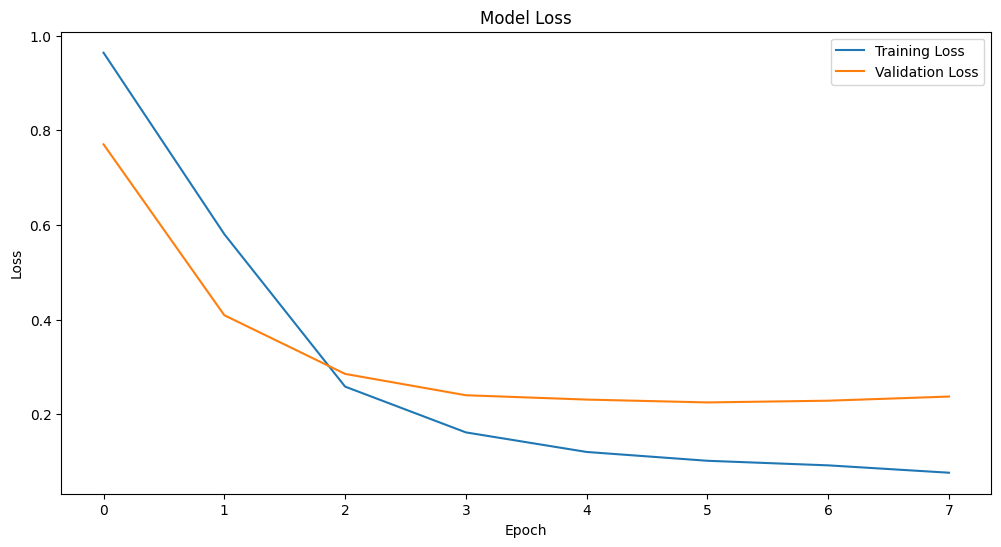

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

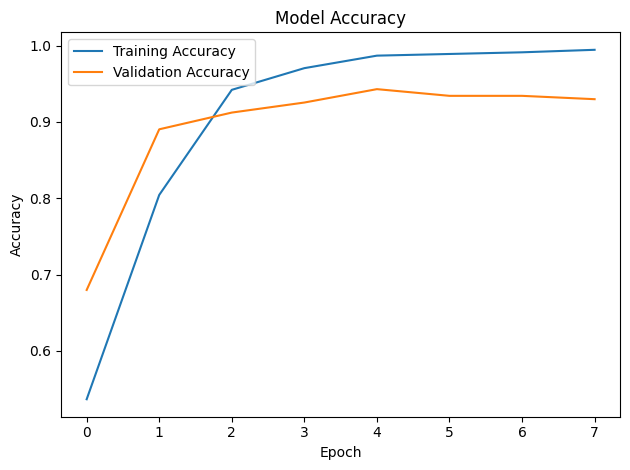

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Save the model to model.h5
model.save('model_ketiga.h5')

In [ ]:
def predict_sms(sms):
    sms_seq = tokenizer.texts_to_sequences([sms])
    sms_pad = pad_sequences(sms_seq, maxlen=X.shape[1])
    prediction = model.predict(sms_pad)
    predicted_label = np.argmax(prediction, axis=1)
    original_label = label_encoder.inverse_transform(predicted_label)

    return original_label[0]

test_sms = "nulis kerudung kirain warna jins"
print("Predicted label:", predict_sms(test_sms))

# Access API Deploy

In [ ]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account (https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-authentication.html)
API_KEY = "t8cxXR85HBxzhnCW0_xPvHnRIMJlpHg9p3bFPD57rJLF"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# Define the input fields and values for scoring
# Replace these with your actual data
array_of_input_fields = ["teks"]  # Example: Assuming 'teks' is your input field
array_of_values_to_be_scored = ["Ini promo dari telkomsel"]  # Example: Replace with your actual text
another_array_of_values_to_be_scored = ["promo dari telkomsel"]  # Example: Replace with another text

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"fields": [array_of_input_fields], "values": [array_of_values_to_be_scored, another_array_of_values_to_be_scored]}]}


response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/618e6f26-42e3-4a06-a217-6e49255c941b/predictions?version=2021-05-01', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'trace': '7694cb8c38b62534381a244697bdc6fd', 'errors': [{'code': '7694cb8c38b62534381a244697bdc6fd', 'message': 'Input embedding_input expected input data with shape: [None, 42] but received input data with shape: [2, 1]. Retry the prediction with input data with correct shape'}]}


In [ ]:
import requests
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set your IBM Cloud API key
API_KEY = "t8cxXR85HBxzhnCW0_xPvHnRIMJlpHg9p3bFPD57rJLF"

# Get the token for authentication
token_response = requests.post(
    'https://iam.cloud.ibm.com/identity/token',
    data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'}
)
mltoken = token_response.json()["access_token"]

# Set the header with the obtained token
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# Define your real data (only one sentence)
real_text_data = ["2.5 GB/30 hari hanya Rp 35 Ribu Spesial"]

# Preprocess the data: Convert text to numeric vectors of length 42
vectorizer = TfidfVectorizer(max_features=42, min_df=1, max_df=1.0)  # Adjusted max_df to 1.0
vectorized_data = vectorizer.fit_transform(real_text_data).toarray()

# Check the shape of the vectorized data
print("Shape of vectorized data before padding:", vectorized_data.shape)

# Padding the data to ensure the shape is [None, 42]
vectorized_data_padded = pad_sequences(vectorized_data, maxlen=42, dtype='float32', padding='post', truncating='post')

# Check the shape after padding
print("Shape of vectorized data after padding:", vectorized_data_padded.shape)

# Prepare the payload for scoring
payload_scoring = {
    "input_data": [
        {
            #"fields": [f"feature_{i}" for i in range(42)],  # Generic feature names
            "values": vectorized_data_padded.tolist()  # Use padded vectors
        }
    ]
}

# Make the API request to the scoring endpoint
response_scoring = requests.post(
    'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/29463be2-f8ae-414f-8050-34c4103ad120/predictions?version=2021-05-01',
    json=payload_scoring,
    headers={'Authorization': 'Bearer ' + mltoken}
)

# Print the response
print("Scoring response")
response_scoring.json()

Shape of vectorized data before padding: (1, 8)
Shape of vectorized data after padding: (1, 42)
Scoring response


{'predictions': [{'id': 'dense_5',
   'fields': ['prediction', 'prediction_classes', 'probability'],
   'values': [[[0.9849468469619751,
      0.009864062070846558,
      0.005189188290387392],
     0,
     [0.9849468469619751, 0.009864062070846558, 0.005189188290387392]]]}]}